# Plot *eba175* C Allele Proportions

# Introduction

This notebook recreates [Supplement Figure 11](https://figshare.com/ndownloader/files/38478530) from the Pf7 paper - a bar plot which shows the proportions of the *eba175* C allele in the major subpopulations.

Eba175 is a vaccine candidate gene with two distinct different allelic forms, known as the F- and C-types. Investigating the prevalence of the *eba175* C allele can help assess whether *eba175* experiences balancing selection, likely influenced by negative frequency-dependent selection driven by interactions with the human immune system.

**This notebook should take approximately two minutes to run.**

# Setup

Install the malariagen Python package:

In [1]:
!pip install -q --no-warn-conflicts malariagen_data
import malariagen_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.5/302.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:

Import required python libraries that are installed at colab by default.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from google.colab import drive

# Access Pf7 Data

We use the malariagen data package to load sample data and metadata.

In [3]:
release_data = malariagen_data.Pf7()
sample_metadata = release_data.sample_metadata()

For this figure, we also need to load the *eba175* gene allele frequencies in major populations.

This data is available as a .txt file from a web link. We can directly read the data into a dataframe using the read_csv function in pandas!

If you click the left sidebar folder icon, you should see this file appear.

In [4]:
# Read in calls file direct from MalariaGEN website
df_eba = pd.read_csv(
    'https://www.malariagen.net/sites/default/files/Pf7_eba175_callset.txt'
    , sep='\t'
    , index_col=0
    , low_memory=False
)
# Check shape (should contain 16,203 as this is the number of QC pass samples in Pf7)
print(df_eba.shape)
# View the new dataframe stucture
df_eba.head(3)

(16203, 3)


,f_frac,c_frac,eba175_call
Sample,,,
FP0008-C,0.863946,0.000000,F
FP0009-C,0.003988,0.627346,Mixed
FP0010-CW,0.666667,0.000000,F


# Combine data into a single dataframe

In order to create the figure, it's convenient to work with combined data.

We retain all samples from sample_metadata which pass QC (n = 16,203).


In [5]:
# Merge the two dataframes on identical Sample IDs
df_calls = (
    sample_metadata.loc[sample_metadata['QC pass']]
    .merge(df_eba, on='Sample')
)
print(df_calls.shape)
# View the new dataframe stucture
df_calls.head(3)


(16203, 20)


,Sample,Study,Country,Admin level 1,Country latitude,Country longitude,Admin level 1 latitude,Admin level 1 longitude,Year,ENA,All samples same case,Population,% callable,QC pass,Exclusion reason,Sample type,Sample was in Pf6,f_frac,c_frac,eba175_call
0,FP0008-C,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR1081237,FP0008-C,AF-W,82.16,True,Analysis_set,gDNA,True,0.863946,0.000000,F
1,FP0009-C,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR1081238,FP0009-C,AF-W,88.85,True,Analysis_set,gDNA,True,0.003988,0.627346,Mixed
2,FP0010-CW,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR2889621,FP0010-CW,AF-W,86.46,True,Analysis_set,sWGA,False,0.666667,0.000000,F


# Distribution of allelic types by population

First, we check the frequency of allelic types in the overall dataset before checking in each population.

In [6]:
num_F = np.count_nonzero(df_calls['eba175_call'] == 'F')
num_C = np.count_nonzero(df_calls['eba175_call'] == 'C')
proportion_C = num_C / (num_C + num_F)
print(f"We see {num_F:,} samples with the F allele and {num_C:,} samples with the C allele, \
meaning that overall {proportion_C:.0%} of samples that have an unambiguous call have the rarer C allele.")

We see 7,380 samples with the F allele and 3,364 samples with the C allele, meaning that overall 31% of samples that have an unambiguous call have the rarer C allele.


Now, we will examine individual population allelic frequencies to generate the corresponding figure.

First we define the populations (for more details on populations, please visit the [Supplement](https://figshare.com/ndownloader/files/38478530)).

In [7]:
# Define populations in an ordered dictionary
populations = collections.OrderedDict()
populations['SA'] = 'South America'
populations['AF-W'] = 'West Africa'
populations['AF-C'] = 'Central Africa'
populations['AF-NE'] = 'Northeast Africa'
populations['AF-E'] = 'East Africa'
populations['AS-S-E'] = 'Eastern South Asia'
populations['AS-S-FE'] = 'Far-eastern South Asia'
populations['AS-SE-W'] = 'Western Southeast Asia'
populations['AS-SE-E'] = 'Eastern Southeast Asia'
populations['OC-NG'] = 'Oceania'

Next, we need a function to aggregate allele frequencies in each population

In [8]:
# Function to aggregate population frequencies
def my_agg(x):
    names = collections.OrderedDict()
    names['Number F'] = np.count_nonzero(x['eba175_call'] == 'F')
    names['Number C'] = np.count_nonzero(x['eba175_call'] == 'C')
    names['Number F or C'] = names['Number F'] + names['Number C']
    names['Proportion C'] = names['Number C'] / names['Number F or C'] if names['Number F or C'] > 0 else np.nan
    return pd.Series(names)
# Summary table with population aggregates
df_pop_summary = df_calls.groupby('Population').apply(my_agg).loc[populations.keys()]
df_pop_summary

,Number F,Number C,Number F or C,Proportion C
Population,,,,
SA,28.0,44.0,72.0,0.611111
AF-W,3111.0,762.0,3873.0,0.196747
AF-C,191.0,30.0,221.0,0.135747
AF-NE,45.0,48.0,93.0,0.516129
AF-E,751.0,210.0,961.0,0.218522
AS-S-E,90.0,15.0,105.0,0.142857
AS-S-FE,712.0,343.0,1055.0,0.325118
AS-SE-W,702.0,741.0,1443.0,0.513514
AS-SE-E,1655.0,1056.0,2711.0,0.389524


# Make the figure

First, we set-up population-specific colour-codes.

In [9]:
# Create an ordered dictionary which maps the codes for major sub-populations -from west to east- to a colour code.
population_colours = collections.OrderedDict()
population_colours['SA']       = "#4daf4a"
population_colours['AF-W']     = "#e31a1c"
population_colours['AF-C']     = "#fd8d3c"
population_colours['AF-NE']    = "#bb8129"
population_colours['AF-E']     = "#fecc5c"
population_colours['AS-S-E']  = "#dfc0eb"
population_colours['AS-S-FE']  = "#984ea3"
population_colours['AS-SE-W'] = "#9ecae1"
population_colours['AS-SE-E'] = "#3182bd"
population_colours['OC-NG']    = "#f781bf"

We are ready to make the bar plot using df_pop_summary data.

<ipython-input-10-1f8c815b50e5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_pop_summary.index, rotation=90)


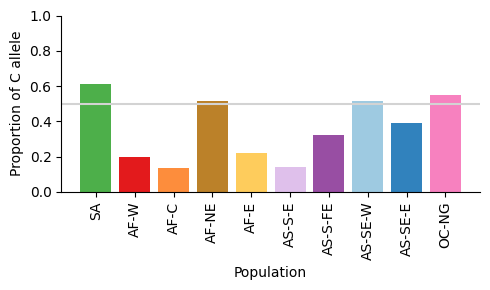

In [10]:
# Set the figure size
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
# Set the chart variables
ax.bar(df_pop_summary.index, df_pop_summary['Proportion C'], color=population_colours.values())
# Set the labels
ax.set_xticklabels(df_pop_summary.index, rotation=90)
ax.set_xlabel('Population')
ax.set_ylabel('Proportion of C allele')
# Hide the right spine (axis line) of the plot
ax.spines['right'].set_visible(False)
# Hide the top spine (axis line) of the plot
ax.spines['top'].set_visible(False)
# Set the y-axis limits
ax.set_ylim(0, 1)
# Add a horizontal line showing %50 proportion
ax.axhline(0.5, color='lightgray')
# Adjust figure to ensure everything fits nicely
fig.tight_layout()

**Figure legend:** Proportion of C allele of *eba175* in different major subpopulations. Horizontal line shows 50% proportion.

## Save the figure

We can output this to a location in Google Drive

First we need to connect Google Drive by running the following:

In [11]:
# You will need to authorise Google Colab access to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# This will send the file to your Google Drive, where you can download it from if needed
# Change the file path if you wish to send the file to a specific location
# Change the file name if you wish to call it something else

fig.savefig('/content/drive/My Drive/Proportion_of_C_allele_by_population_20210720.pdf')
fig.savefig('/content/drive/My Drive/Proportion_of_C_allele_by_population_20210720.png', dpi=480) # increase the dpi for higher resolution

# Distribution of allelic types at a more granular level

Here we look at the population characteristics organized by country, first-level administrative division, and year.

Then, we identify key summary statistics, minimum and maximum proportions of C allele, within each year and country.

This table was not included in the Pf7 manuscript.


In [13]:
# Group the df_calls by variables (Population, Country, Admin level 1, and Year)
# and apply the custom aggregation function 'my_agg' to calculate the allele frequencies
df_admin1_year_summary = df_calls.groupby(['Population', 'Country', 'Admin level 1', 'Year']).apply(my_agg)
# Print the shape of the resulting DataFrame
print(df_admin1_year_summary.shape)
# Calculate and print the maximum and minimum proportions of the C-type allele
# considering n = number of samples with an F or C type allele called
# min and max C allele proportions where n >= 30
print(f"Max proporiton C (n > 30) = {df_admin1_year_summary.loc[df_admin1_year_summary['Number F or C'] > 30, 'Proportion C'].max()}")
print(f"Min proporiton C (n > 30) = {df_admin1_year_summary.loc[df_admin1_year_summary['Number F or C'] > 30, 'Proportion C'].min()}")
# display 200 rows of resulting df where n > 30
pd.options.display.max_rows = 200
df_admin1_year_summary.loc[df_admin1_year_summary['Number F or C'] > 30]

(297, 4)
Max proporiton C (n > 30) = 0.8048780487804879
Min proporiton C (n > 30) = 0.018518518518518517


Number F  \
Population Country                          Admin level 1 Year               
AF-C       Democratic Republic of the Congo Kinshasa      2012.0      84.0   
                                                          2013.0      51.0   
                                                          2014.0      31.0   
AF-E       Kenya                            Kilifi        1996.0      31.0   
                                                          2007.0      42.0   
                                                          2009.0      34.0   
                                                          2010.0      47.0   
                                                          2011.0      39.0   
                                                          2012.0      49.0   
           Malawi                           Chikwawa      2011.0     109.0   
           Tanzania                         Kigoma        2014.0      54.0   
                                            Lindi         2013.0      30.0   
                                            Tanga         2013.0      75.0   
                                                          2014.0      70.0   
AF-NE      Sudan                            Khartoum      2017.0      17.0   
AF-W       Benin                            Littoral      2016.0      53.0   
           Burkina Faso                     Haut-Bassins  2008.0      36.0   
           Cameroon                         Sud-Ouest     2013.0      95.0   
           Côte d'Ivoire                    Abidjan       2013.0      38.0   
           Gabon                            Wouleu-Ntem   2014.0      31.0   
           Gambia                           North Bank    1984.0      53.0   
                                            Upper River   2013.0      25.0   
                                                          2014.0     106.0   
                                                          2015.0      33.0   
                                                          2016.0      37.0   
                                                          2017.0      36.0   
                                            Western       2008.0      43.0   
                                                          2015.0      54.0   
           Ghana                            Ashanti       2014.0      87.0   
                                                          2015.0      61.0   
                                            Central       2014.0      51.0   
                                            Greater Accra 2018.0      64.0   
                                            Upper East    2009.0      51.0   
                                                          2010.0      94.0   
                                                          2011.0      45.0   
                                                          2013.0     111.0   
                                                          2014.0      22.0   
                                                          2015.0     121.0   
                                                          2016.0     110.0   
                                                          2017.0     319.0   
                                                          2018.0     356.0   
           Guinea                           Nzerekore     2011.0      44.0   
           Mali                             Bamako        2013.0      80.0   
                                            Kayes         2015.0      35.0   
                                                          2016.0      27.0   
                                            Koulikoro     2013.0      49.0   
                                                          2014.0      40.0   
                                                          2016.0     139.0   
           Nigeria                          Lagos         2017.0      24.0   
           Senegal                          Dakar         2013.0      31.0   
          

**Distribution of allelic types in each country, first-level administrative division and year.**
This table presents a breakdown of longitudinal and geospatial data concerning the distribution of allelic types (F and C) across 97 combinations of first-level administrative divisions and years for which over 30 samples have either an F or a C type called. The fact that we see both types present in all 97 combinations of admin division and year adds weight to the argument that *eba175* is under balancing selection.